## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

random_data = np.random.random((2000, 2))
X = random_data[:, 0]
y = random_data[:, 1]

def assmuing_function(x):
    return 13.4 * x + 5 + random.randint(-5, 5)

y = [assmuing_function(x) for x in X]
y = np.array(y)

reg = LinearRegression().fit(X.reshape(-1, 1), y)

def f(x): 
    return reg.coef_ * x + reg.intercept_

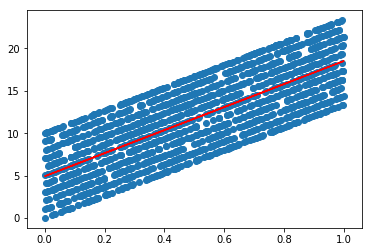

In [2]:
%matplotlib inline
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [3]:
print(reg.score(X.reshape(-1, 1), y))
print(reg.coef_)
print(reg.intercept_)

0.6093049265418767
[13.59472875]
4.921012234211291


In [4]:
for i in range(10):
    testNum = random.randint(-10, 10)
    myResult = reg.predict([[testNum]])
    print(testNum,"\t",myResult)

0 	 [4.92101223]
-1 	 [-8.67371651]
9 	 [127.27357096]
-4 	 [-49.45790275]
-1 	 [-8.67371651]
-7 	 [-90.24208899]
-1 	 [-8.67371651]
-4 	 [-49.45790275]
-2 	 [-22.26844526]
1 	 [18.51574098]


### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [5]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import cityblock
import numpy as np

def distance(x1, x2):
    return cosine(x1, x2)

def manhattanDistance(x1, x2):
    return cityblock(x1, x2);

def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    y_hats = [_y for x, _y in most_similars]
    print(most_similars)
    return np.mean(y_hats)

def manPredict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: manhattanDistance(xi[0], x))[:k]
    y_hats = [_y for x, _y in most_similars]
    print(most_similars)
    return np.mean(y_hats)

knn_stored = model(X, y)

In [6]:
predict(10,10)

[(0.38081592637891803, 5.102933413477501), (0.33577256393772037, 11.499352356765453), (0.8100300556499618, 13.854402745709487), (0.27729585712444205, 11.715764485467524), (0.4520260175088644, 13.057148634618784), (0.30601547712174415, 10.100607393431371), (0.5141785080206448, 11.88999200747664), (0.7326954992480068, 10.818119689923291), (0.6793929239168109, 14.103865180485267), (0.3381800165715386, 5.531612222058618)]


10.767379812941394

In [7]:
manPredict(10,10)

[(0.999807265636036, 14.397417359522883), (0.9993780433893054, 21.39166578141669), (0.998107628675327, 17.37464222424938), (0.9979133650601789, 21.3720390918064), (0.9978006268881554, 13.370528400301282), (0.9972600427052345, 21.363284572250144), (0.996725949938246, 17.3561277291725), (0.9962280837313149, 20.349456321999618), (0.9952617158759732, 18.33650699273804), (0.9948721695808845, 16.33128707238385)]


18.16429555458408

In [8]:
knn_stored

[(0.8561593484326183, 13.472535268997085),
 (0.11003159285945252, 8.474423344316664),
 (0.7811845860718425, 10.46787345336269),
 (0.885796631463067, 17.869674861605098),
 (0.045962211321575075, 8.615893631709106),
 (0.504377788344495, 9.758662363816233),
 (0.10706196010931834, 9.434630265464866),
 (0.4338685171885276, 8.813838130326271),
 (0.8145644874469161, 20.91516413178868),
 (0.4108765266791651, 12.505745457500812),
 (0.6814923315874142, 17.13199724327135),
 (0.8259179521277216, 18.06730055851147),
 (0.31580749624435633, 4.231820449674375),
 (0.2299855345011781, 4.081806162315786),
 (0.7395655982844871, 12.910179017012128),
 (0.40437425719328124, 5.41861504638997),
 (0.8428552117434317, 11.294259837361984),
 (0.3137892545604455, 9.20477601110997),
 (0.06376819311032766, 9.85449378767839),
 (0.019877399371095672, 6.266357151572682),
 (0.46434662241971125, 7.222244740424131),
 (0.9930100264255077, 17.306334354101804),
 (0.4922598910173819, 11.596282539632917),
 (0.30698390598279834,

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [9]:
from collections import Counter
from icecream import ic
import numpy as np
import pandas as pd

def entropy(eles):
    counter = Counter(eles)
    probs = [counter[c]/len(eles) for c in set(eles)]
    ic(probs)
    return -sum(p*np.log(p) for p in probs)

In [10]:
entropy([1, 1, 0, 1])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [13]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    #'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

dataset = pd.DataFrame.from_dict(mock_data)
#sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()
#sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()
#splited_data = dataset[dataset['family_number'] == 1]
#_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()
#_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()

def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
                        
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_1)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [14]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_1: [1, 1]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1

spliter is: ('income', '-10')
the min entropy is: 0.6730116670092565


('income', '-10')

In [15]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

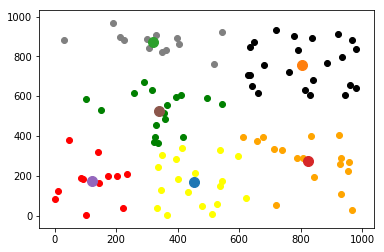

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from collections import defaultdict

X1 = [random.randint(0, 1000) for _ in range(100)]
X2 = [random.randint(0, 1000) for _ in range(100)]
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

cluster = KMeans(n_clusters=6, max_iter=500,n_init=10,init='k-means++')
cluster.fit(tranning_data)

#def distance(): return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

centers = defaultdict(list)

for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
    
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)


In [17]:
print(X1,'\n',X2)

[222, 258, 405, 647, 325, 365, 32, 10, 629, 335, 681, 365, 417, 456, 336, 411, 144, 416, 227, 396, 980, 778, 102, 359, 953, 543, 816, 324, 922, 2, 48, 302, 713, 958, 202, 967, 434, 306, 86, 151, 496, 761, 740, 141, 235, 543, 317, 841, 212, 807, 831, 91, 598, 721, 927, 361, 932, 614, 519, 678, 932, 345, 721, 663, 357, 527, 332, 511, 657, 887, 636, 397, 642, 623, 350, 546, 962, 102, 290, 189, 394, 834, 936, 788, 945, 537, 980, 350, 539, 331, 836, 844, 480, 330, 173, 634, 966, 792, 926, 402] 
 [36, 616, 861, 874, 395, 3, 881, 123, 705, 362, 756, 555, 394, 214, 246, 604, 163, 341, 882, 598, 640, 901, 584, 487, 224, 561, 629, 370, 910, 85, 382, 887, 332, 271, 198, 884, 117, 841, 191, 530, 589, 719, 327, 320, 210, 174, 631, 680, 898, 287, 604, 184, 299, 53, 259, 833, 289, 394, 763, 395, 109, 130, 931, 618, 517, 56, 40, 6, 374, 764, 846, 893, 651, 86, 306, 923, 656, 4, 669, 967, 283, 401, 799, 288, 606, 328, 839, 824, 147, 453, 893, 195, 47, 907, 198, 708, 27, 831, 403, 183]


In [19]:
print(cluster.labels_)
print('Predict :',cluster.predict([[91,73]]))

[4 5 2 1 5 0 2 4 1 5 1 5 5 0 0 5 4 0 2 5 1 1 5 5 3 5 1 5 1 4 4 2 3 3 4 1 0
 2 4 5 5 1 3 4 4 0 5 1 2 3 1 4 0 3 3 2 3 3 2 3 3 0 1 1 5 0 0 0 3 1 1 2 1 0
 0 2 1 4 5 2 0 3 1 3 1 0 1 2 0 5 1 3 0 2 4 1 3 1 3 0]
Predict : [4]


## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型是为实现某种目的借助实体或者虚拟表现组成阐述形态结构的一种抽象。无论怎样对模型进行抽象，我们选择抽取的特征都是片面的。多数情况下我们不需要对事物进行完整抽象，只要考虑重要的特征，实现特定领域的应用目的即可。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:欠拟合(underfitting)和过拟合(overfitting)是导致模型泛化能力不高的两种常见原因，都是模型学习能力与数据复杂度之间失配的结果。通常欠拟合在模型学习能力较弱，数据复杂度却较高时出现，因为这种情况下模型学习能力不足，不能很好的学习到数据集中的一般规律，从而导致泛化能力弱。与之相反，过拟合在模型学习能力过强时出现，这种情况下模型的学习能力太强，以至于捕捉过多训练集中样本自身的独有特征，并将其认为是一般规律，同样这种情况也会导致模型泛化能力下降。欠拟合与过拟合的区别在于，欠拟合在训练集和测试集上的效果都较差；而过拟合往往在训练集上效果特别好，在测试集效果却比较差。机器学习的训练过程中，欠拟合主要表现为输出结果的高偏差，而过拟合主要表现为输出结果的高方差

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:准确率(Accuracy)：P = (TP+TN)/(TP+TN+FP+FN) 正确预测的样本数占总预测样本数的比值，它不考虑预测的样本是正例还是负例；精确度（Precision）:P = TP/(TP+FP),正确预测的正样本数占所有预测为正样本的数量的比值，也就是说所有预测为正样本的样本中有多少是真正的正样本；precision只关注预测为正样本的部分，而accuracy考虑全部样本。召回率(Recall)：R = TP/(TP+FN) = 1 - FN/T,正确预测的正样本数占所有正样本的数量的比值。机器学习中，准确率和召回率是互相影响的，往往需要平衡考量。AUC，ROC曲线下的面积，即真正比率与假正比率的曲线的积分，适用与数据不均衡状态下的判断 。F1 score：P=2·Precision·Recall/（Precision+Recall）， 即precision 和 recall 的调和平均数，综合考虑了精确度和召回率。F2 score：P=(1+β^2)·Precision·Recall/(β^2·Precision+Recall),其中β=2：F1 score的泛化，同样是precision 和 recall 的调和平均数，β用于调整精确度和召回率权重比例，提高精确率重要度，就减小β 的值 ，提高召回率的重要度，那就增大β的值。β=2时即为：F2 score、这时召回率权重较大。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:简单来说机器学习就是能够自动改进的计算机程序，与传统的分析式编程的区别在于机器学习以经验和概率论等为基础，完成编程后需要进行一定的人工训练才能实现可用目的。同时，传统的程序的结果通常都可以预测和分析回溯的，机器学习程序的运行结果则有一定的出错概率，并且常常很难分析出结果的判断逻辑。机器学习优势在于处理海量复杂重复性工作时极大地减少编程的需求、能够快速实现软件目的。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans:基本赞同题中观点，评价标准能够直接反映问题的需求，机器学习中模型划分的种类相对固定，一个成功的评价标准有利于快速选择模型，尽早进入超参调整阶段，因此评价标准在解决机器学习任务中占有重要地位。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [20]:
from collections import Counter
from icecream import ic
import numpy as np
import pandas as pd
import math
TARGET = 'bought'

def entropy(eles):
    counter = Counter(eles)
    probs = [counter[c] / len(eles) for c in set(eles)]
    #ic(probs)
    return - sum(p * np.log(p) for p in probs)

mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    #'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

dataset = pd.DataFrame.from_dict(mock_data)


def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        #ic(f)
        values = set(training_data[f])
        #ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            #ic(sub_split_1)
            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            #ic(sub_split_2)
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    #print('spliter is: {}'.format(spliter))
    #print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

def createTree(tData):
    restTarget = set(tData[TARGET])
    if len(restTarget) <= 1:
        return restTarget
    f, v = find_the_optimal_spilter(tData,TARGET)
    myTree = {f:{}}
    for dValue in set(mock_data[f]):
        restSet = tData[tData[f] == dValue].drop([f],axis=1)
        restTarget = set(restSet[TARGET])
        if len(restSet.columns.tolist()) <= 1 or len(restTarget) <= 1:
            myTree[f][dValue] = restTarget
        else:
            myTree[f][dValue]=createTree(restSet)
    return myTree

myDeTree = createTree(dataset)

def predicate(InTree,testDict):
    firstNode = list(InTree.keys())
    classLabel = None
    for key in testDict.keys():
        if key in firstNode:
            if type(InTree[key]) == set:
                classLabel = list(InTree[key])
            elif type(InTree[key][testDict[key]]) == set:
                classLabel = list(InTree[key][testDict[key]])
            else:
                classLabel = predicate(InTree[key][testDict[key]],testDict)
    return classLabel

In [21]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()
print(sub_split_1)
print(set(dataset.columns.tolist()) - {'bought'})
print(dataset[dataset['family_number'] == 1].drop(['family_number'],axis=1))

[1, 1, 0, 0, 0]
{'family_number', 'gender', 'income'}
  gender income  bought
0      F    +10       1
1      F    -10       1
3      F    +10       0
4      M    +10       0
5      M    +10       0


In [22]:
print('bought: ', predicate(myDeTree,{'gender':'M', 'income':'-10','family_number':1}))

bought:  [1]


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [29]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

def price(rm, k, b):
    return k * rm + b

def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
    #return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i >= y_hat_i :
            gradient += -x_i
        else :
            gradient += x_i
        #gradient += (y_i-y_hat_i) * x_i
    return gradient / n
    #return -2/n* gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1
        else:
            gradient += 1
        #gradient += (y_i-y_hat_i)
    return gradient / n
    #return -2/n*gradient

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-1

iteration_num = 2000
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    if i == 500:
        learning_rate = 1e-3
    elif i == 100:
        learning_rate = 1e-2
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    if i % 100 == 0:
        print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b


Iteration 0, the loss is 440.8539804650466, parameters k is 88.98207311208697 and b is -95.83300974891458
Iteration 100, the loss is 36.7986262615596, parameters k is 26.203616985604423 and b is -105.8160137014833
Iteration 200, the loss is 7.964645926858134, parameters k is 21.01787836900362 and b is -106.61257496630546
Iteration 300, the loss is 7.275492296836484, parameters k is 20.403535957936406 and b is -106.64115204140434
Iteration 400, the loss is 7.270735494806367, parameters k is 20.38790662987325 and b is -106.57463030227417
Iteration 500, the loss is 7.266090877951722, parameters k is 20.376521254379306 and b is -106.50743662638503
Iteration 600, the loss is 7.26562641626626, parameters k is 20.37538271682991 and b is -106.50071725879612
Iteration 700, the loss is 7.265161954580794, parameters k is 20.374244179280517 and b is -106.4939978912072
Iteration 800, the loss is 7.264697492895325, parameters k is 20.373105641731122 and b is -106.48727852361829
Iteration 900, the lo

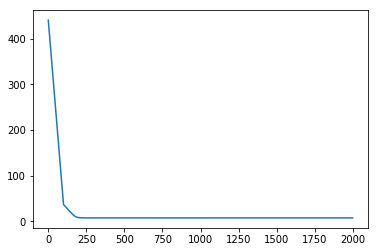

In [30]:
plt.plot(list(range(iteration_num)),losses)

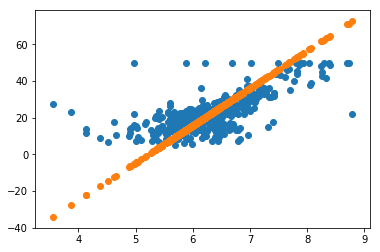

In [31]:
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

X shape:  (506, 13)
Y shape:  (506,)
X[1] shape:  (13,)
X[1] : [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
 9.1400e+00]
dataset.feature_names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


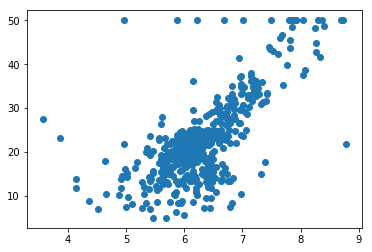

In [32]:
#dataset
print("X shape: ", x.shape)
print("Y shape: ", y.shape)
print("X[1] shape: ", x[1].shape)
print("X[1] :", x[1])
print("dataset.feature_names: ", dataset.feature_names)

plt.scatter(X_rm,y)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)